In [57]:
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree

## Описание набора данных

In [3]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## 1. Загрузка данных

In [4]:
dataset = fetch_california_housing(as_frame=True)
house_df = pd.concat([dataset.data, dataset.target], axis=1)
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2. Проверка на пропуски

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 3. Нормализация 

Для нормализации возьмем признак MedInc.

Возьмем за основу минмакс нормализацию, формула приведена ниже:
![image](https://www.google.com/url?sa=i&url=https%3A%2F%2Flearn.microsoft.com%2Fru-ru%2Fazure%2Fmachine-learning%2Fcomponent-reference%2Fnormalize-data&psig=AOvVaw1KyhyF78vR8PqfiafwMtYR&ust=1680789512323000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCNitqIDzkv4CFQAAAAAdAAAAABAZ![image.png](attachment:image.png))

In [19]:
house_df['MedInc_Norm'] = (house_df['MedInc'] - np.min(house_df['MedInc'])) / (np.max(house_df['MedInc']) - np.min(house_df['MedInc']))

In [21]:
house_df.drop('MedInc', axis=1, inplace=True)

## 4. Деление выборки на test  и  train

In [24]:
X = house_df.drop('MedHouseVal', axis=1)
y = house_df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 5. Построение модели линейной регрессии

In [27]:
regression_model = LinearRegression()

In [28]:
regression_model.fit(X_train, y_train)

LinearRegression()

### 5.1 Оценка модели

In [39]:
regression_model.score(X_test, y_test)

0.5757877060324518

## 6. Обучение дерева решений

In [83]:
regression_tree = tree.DecisionTreeRegressor()

In [84]:
regression_tree.fit(X_train, y_train)

DecisionTreeRegressor()

### 6.1 Оценка модели дерева

In [85]:
regression_tree.score(X_test, y_test)

0.6212884786454709

## 7. Визуализация дерева

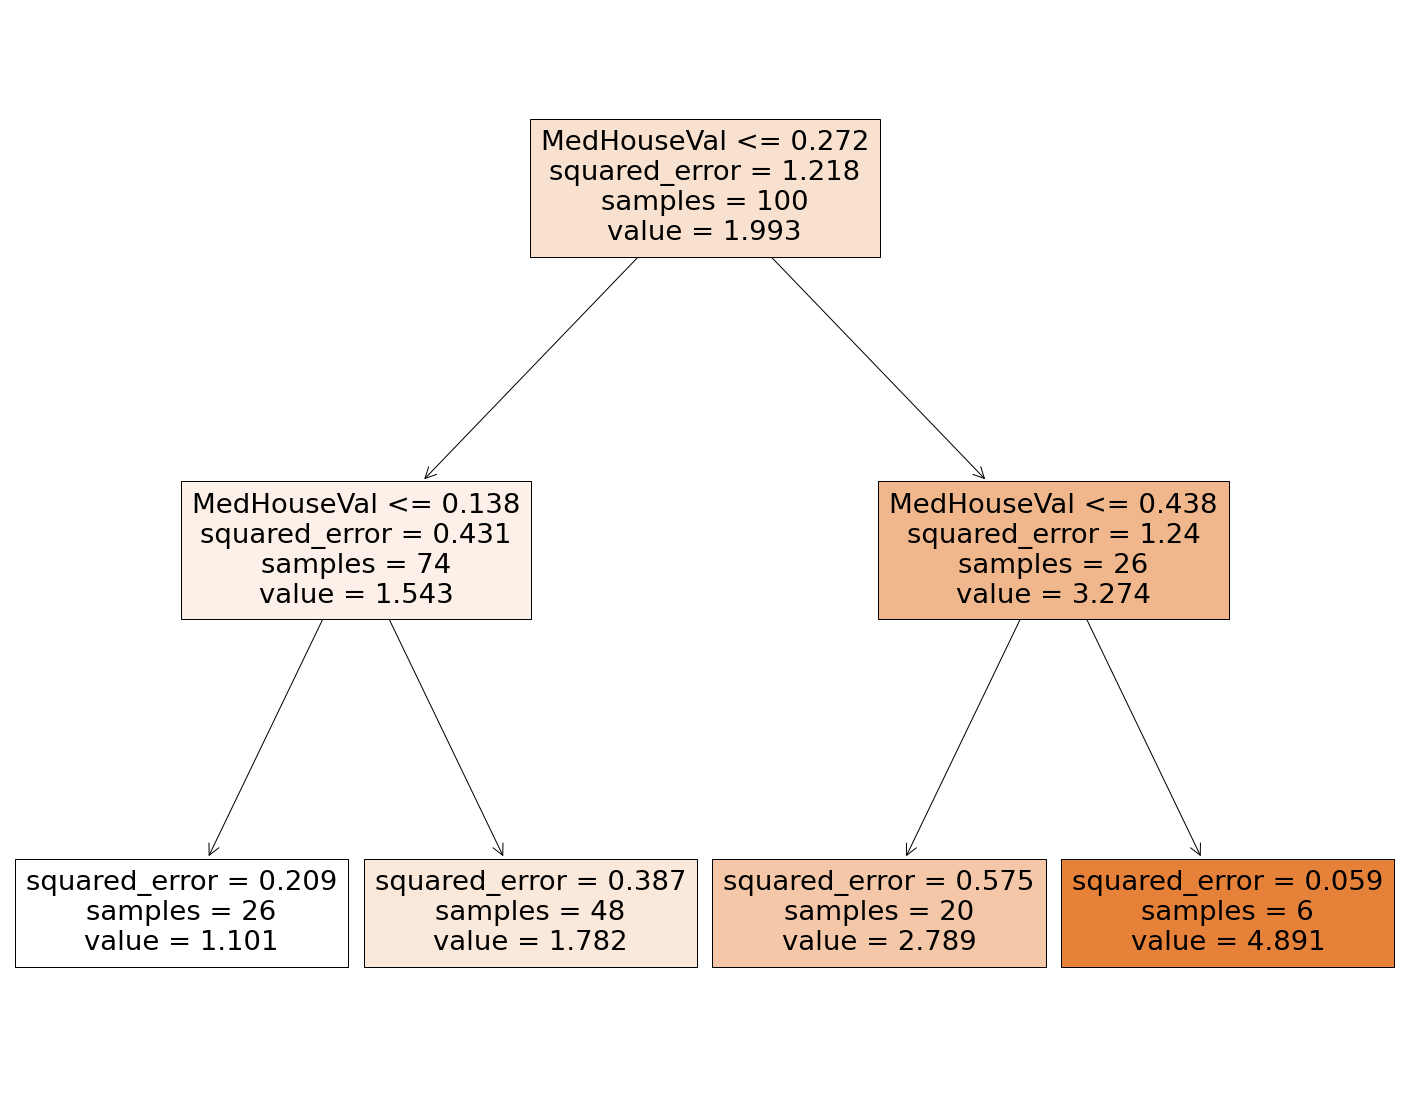

In [90]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree.DecisionTreeRegressor(max_depth=2).fit(X_train[0:100], y_train[0:100]), 
                   feature_names=house_df.columns[0:-1],  
                   class_names=house_df.columns[-1],
                   filled=True)

## 8. Оптимизация параметров модели

### 8.1 Оптимизация параметра max_depth

In [101]:
depth_values = np.arange(1, 16, 1)
result_tree_score = np.array([])

for value in depth_values:
    regression_tree_opt = DecisionTreeRegressor(max_depth=value).fit(X_train, y_train)
    result_tree_score = np.append(result_tree_score, regression_tree_opt.score(X_test, y_test))

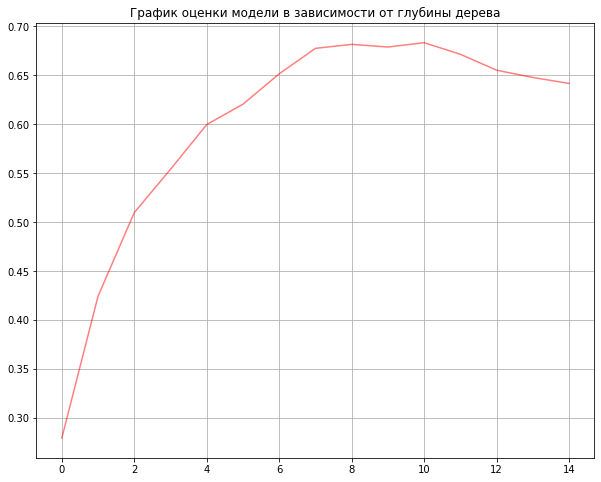

In [107]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(result_tree_score, color='red', alpha=0.5)
plt.title('График оценки модели в зависимости от глубины дерева')
plt.show()

> Как мы видим самый лучший score удалось получить на глубине дерева 7, 8 и 10

### 8.2 Оптимизация параметра min_sample_split

In [131]:
min_sample_split_values = np.arange(0.1, 1, 0.01)
result_tree_score = np.array([])

for value in min_sample_split_values:
    regression_tree_opt = DecisionTreeRegressor(
        min_samples_split=value,
        max_depth=7
    ).fit(X_train, y_train)
    result_tree_score = np.append(result_tree_score, regression_tree_opt.score(X_test, y_test))

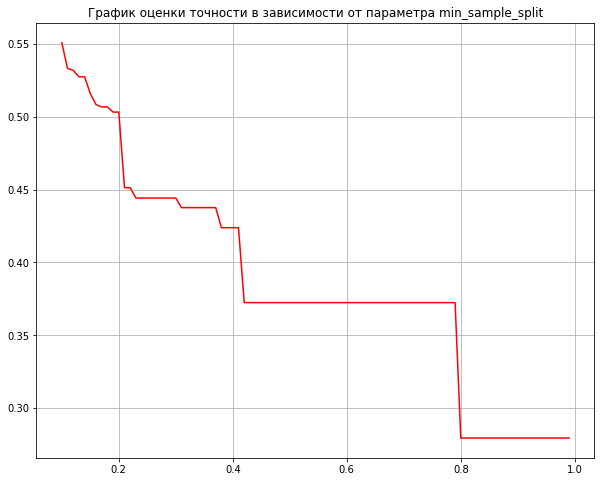

In [132]:
plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(min_sample_split_values, result_tree_score, color='red')
plt.title('График оценки точности в зависимости от параметра min_sample_split')
plt.show()

> Как мы видим чем выше значение нашего параметра тем хуже score у нашей модели => оставим его в нуле

## Итоговая точность двух моделей

In [133]:
regression_model.score(X_test, y_test), DecisionTreeRegressor(max_depth=7).fit(X_train, y_train).score(X_test, y_test)

(0.5757877060324518, 0.6515700686011479)

### Выводы
1. В данном случае модель дерева решений показа себя с лучшей стороны, точность больше на 8 процентов.
2. Плюсы дерева в том, что его можно легко интерпритировать и визуализировать, так же алгоритм довольно быстрый, данные не требуют нормализации, так же возможны пропуски.
3. Минусы дерева, самая главная проблема дерева - это переобучение, чувствительность к шумам.
4. Плюсы линейной регрессии: популярность, простота модели, довольно легкая интерпритация.
5. Минусы линейной регрессии: может моделировать только линейную зависимость.